[array([[[365, 224]],

       [[366, 223]],

       [[367, 223]],

       [[368, 224]],

       [[367, 225]],

       [[366, 225]]], dtype=int32), array([[[365, 221]],

       [[366, 220]],

       [[367, 220]],

       [[368, 221]],

       [[368, 222]],

       [[367, 223]],

       [[366, 222]]], dtype=int32), array([[[358, 217]],

       [[359, 217]],

       [[360, 218]],

       [[361, 218]],

       [[360, 218]],

       [[359, 217]]], dtype=int32), array([[[355, 213]],

       [[356, 212]],

       [[357, 212]],

       [[358, 213]],

       [[357, 214]],

       [[356, 214]]], dtype=int32), array([[[335, 184]],

       [[336, 183]],

       [[337, 184]],

       [[336, 185]]], dtype=int32), array([[[332, 176]],

       [[333, 175]],

       [[334, 176]],

       [[333, 177]]], dtype=int32), array([[[327, 159]],

       [[328, 158]],

       [[329, 159]],

       [[328, 160]]], dtype=int32), array([[[322, 151]],

       [[323, 150]],

       [[324, 151]],

       [[323, 152]]],

<IPython.core.display.Javascript object>


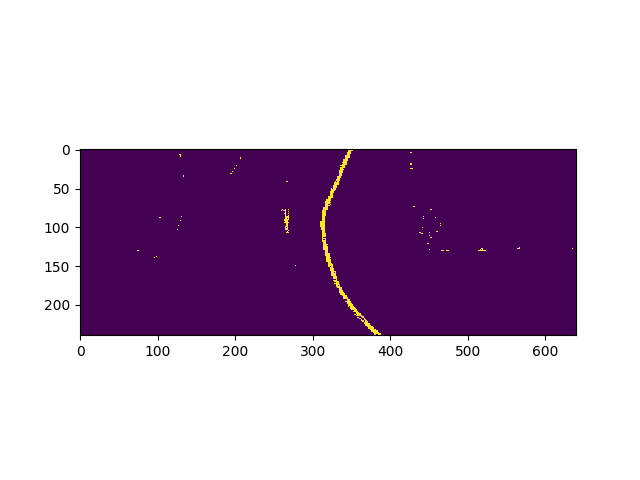

['/bin/sh: 1: Syntax error: "(" unexpected']

In [1]:
import numpy as np
import cv2
%matplotlib notebook
import matplotlib.pyplot as plt

#import mylib		#sucht mylib.py und führt es aus
#die Suche wird durchgeführt in:
#import sys
#sys.path



video_capture = cv2.VideoCapture(0)         # -1: zufällige Kamera auswählen 
#video_capture.set(3, 640)                    # Breite des Bildes festlegen
#video_capture.set(4, 480)                    # Höhe des Bildes festlegen


ret, frame = video_capture.read()        # Video capturen

#img_rgb = frame[:, :, ::-1]             # richtige Farbdarstellung

crop_img = frame[240:480,0:640]

hsv_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV)

lower_pink = np.array([0,50,50])                      
upper_pink = np.array([10,255,255])
    
mask = cv2.inRange(hsv_img, lower_pink, upper_pink)

contours = cv2.findContours(mask, 1, cv2.CHAIN_APPROX_NONE)

testarray = contours[1]                  # findContours gibt ein Tuple aus, diese Zeile schneidet alle Metadaten aus dem Tupel heraus, sodass nur die reinen Koordinaten der Flächen übrig bleiben  

print(testarray)

#test = np.array([[[0,0]], [[10,0]], [[10,10]], [[0,10]]])

#key = cv2.contourArea(contours)

#print(key)

#if len(contours) > 0:
        #c = max(contours, key=cv2.contourArea)              # die größte Kontur finden (if-Befehl)
        #M = cv2.moments(c)
        
        #cx = int(M['m10']/M['m00'])                         # Mittelpunktskoordinaten der größten Fläche finden
        #cy = int(M['m01']/M['m00'])
        
        #if cx >= 360:                                       # Auto positionieren (Linkskurve, Rechtskurve, Geradeausfahrt)
            #print("Linkskurve gebraucht!")
        
        #if cx < 360 and cx > 120:
            #print("Geradeausfahren!")
        
        #if cx <= 120:
            #print("Rechtskurve gebraucht!")
    
#else:
    #print("Keine Linie gefunden.")


plt.figure()
plt.imshow(mask)


!!! Der nächste Schritt ist: den längsten Eintrag aus dem beschnittenen contours-Array herausfiltern und diesen direkt in die cv2.moments() geben

